In [1]:
#Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler

In [4]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
 
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

In [5]:
df = pd.read_csv('../Data/Kaggle Dataset/Emotion_classify_Data.csv')

In [6]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


<Axes: xlabel='Emotion', ylabel='count'>

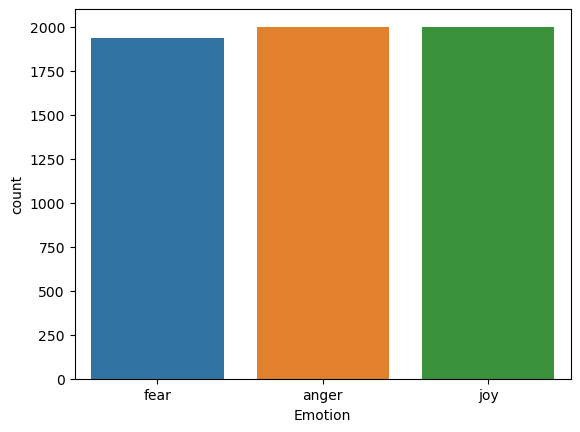

In [7]:
sns.countplot(x = df['Emotion'])

In [8]:
df['length'] = df['Comment'].apply(lambda x:len(x.split(' ')))

In [9]:
df.head()

,Comment,Emotion,length
0,i seriously hate one subject to death but now ...,fear,15
1,im so full of life i feel appalled,anger,8
2,i sit here to write i start to dig out my feel...,fear,29
3,ive been really angry with r and i feel like a...,joy,19
4,i feel suspicious if there is no one outside l...,fear,16


In [10]:
df.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [11]:
df['Emotion'].unique()

array(['fear', 'anger', 'joy'], dtype=object)

In [12]:
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [13]:
y = df['Emotion']
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
# Data Preprocessing
def text_cleaning(txt):    
    txt = txt.lower()
    txt = re.sub(r'[^a-zA-Z\s]', '', txt) 
    words = [word for word in txt.split(' ') if word not in stopwords.words("english")]
    txt = ' '.join(wnl.lemmatize(word) for word in words)
    return txt

In [15]:
df['processed'] = df['Comment'].apply(lambda x: text_cleaning(x))

In [16]:
df.head()

,Comment,Emotion,length,processed
0,i seriously hate one subject to death but now ...,fear,15,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,anger,8,im full life feel appalled
2,i sit here to write i start to dig out my feel...,fear,29,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,19,ive really angry r feel like idiot trusting fi...
4,i feel suspicious if there is no one outside l...,fear,16,feel suspicious one outside like rapture happe...


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['processed'], y, test_size=0.2, random_state=101)

In [18]:
# Let us apply now different classification algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from datetime import datetime

In [19]:
models = {'Logistic Regression':LogisticRegression(), 
         'Support Vector Classifier':SVC(),'Decision Tree':DecisionTreeClassifier(),
         'Random Forest':RandomForestClassifier(),'Neural Network':MLPClassifier(),
         'Stochastic Gradient Descent':SGDClassifier(), 'KNN':KNeighborsClassifier()}

for model, algorithm in models.items():
    start_time = datetime.now() 
    pipe = Pipeline([('tfIdf',TfidfVectorizer()),('model', algorithm)])
    pipe.fit(X_train ,y_train)
    end_time = datetime.now() 
    prediction = pipe.predict(X_test)
    print("\n \n ======= For {} ============".format(model))
    print('Accuracy Score : {} '.format(accuracy_score(prediction,y_test)))
    print('Confusion Matrix \n\n  ',confusion_matrix(prediction,y_test))
    print('\n Classification Report \n ')
    print(classification_report(prediction,y_test))
    time_difference = (end_time - start_time).total_seconds() * 10**3
    print("Execution time of program is: ", time_difference, "ms")


 
 ======= For Logistic Regression ============
Accuracy Score : 0.9242424242424242 
Confusion Matrix 

   [[355  17  13]
 [ 18 368   7]
 [ 21  14 375]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       385
           1       0.92      0.94      0.93       393
           2       0.95      0.91      0.93       410

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188

Execution time of program is:  522.257 ms

 
 ======= For Support Vector Classifier ============
Accuracy Score : 0.9217171717171717 
Confusion Matrix 

   [[354  20  10]
 [ 16 365   9]
 [ 24  14 376]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       384
           1       0.91      0.94      0.93       390
           2       0.95      0.91      0.93   